# Libraries

In [23]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tf.random.set_seed(42)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

# Read Data and Pruning

In [2]:
def prune_columns(dfm:pd.DataFrame, cols:list):
    return dfm.drop(cols, axis=1)

In [3]:
def read_data(ddir:str):
    dataframe = pd.read_csv(ddir)
    pruned_dataframe = prune_columns(dataframe, ['ImagesName'])
    return pruned_dataframe

# Split and Scale Data (Standard Scaler)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
def split_data(dataframe:pd.DataFrame):
    X = dataframe.drop(['Labels'], axis=1)
    y = dataframe['Labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Main

In [24]:
# features_data_dir = '/Users/teguhsatya/Desktop/helloNew/glokumarch/exportedDataframe/matchedFeatures.csv'
features_data_dir = '/Users/teguhsatya/Dev/segeralulus/exportedDataframe/a_features.csv'

In [25]:
df = read_data(features_data_dir)

In [26]:
df.sample(5)

,CDR,VCDR,RDR,I,S,N,T,Labels
88,0.438172,0.404467,0.139785,165,175,111,164,1
14,0.444737,0.531447,0.139474,118,155,138,148,0
127,0.425373,0.412048,0.139303,184,165,171,130,1
62,0.304795,0.324818,0.287671,121,116,118,116,0
80,0.405660,0.323308,0.172956,179,184,107,138,0


In [27]:
X_train_scaled, X_test_scaled, y_train, y_test = split_data(df)

In [28]:
initial_model = tf.keras.Sequential([
    tf.keras.Input((7,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

initial_history = initial_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.4627 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.4701 - lr: 0.0011
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5075 - lr: 0.0012
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5299 - lr: 0.0013
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5522 - lr: 0.0014
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5448 - lr: 0.0015
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5373 - lr: 0.0016
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.5373 - lr: 0.0017
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.5373 - lr: 0.0018
Epoch 10/1

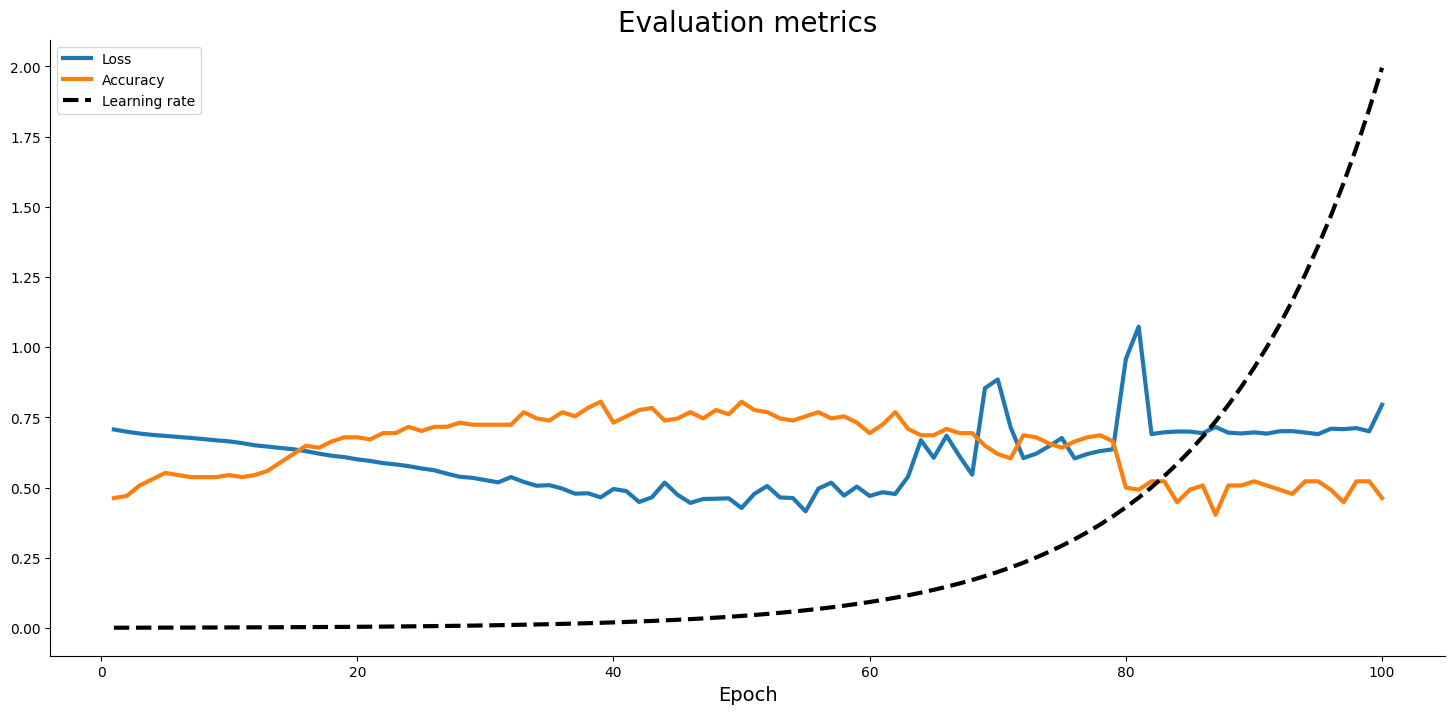

In [29]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 101), 
    initial_history.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

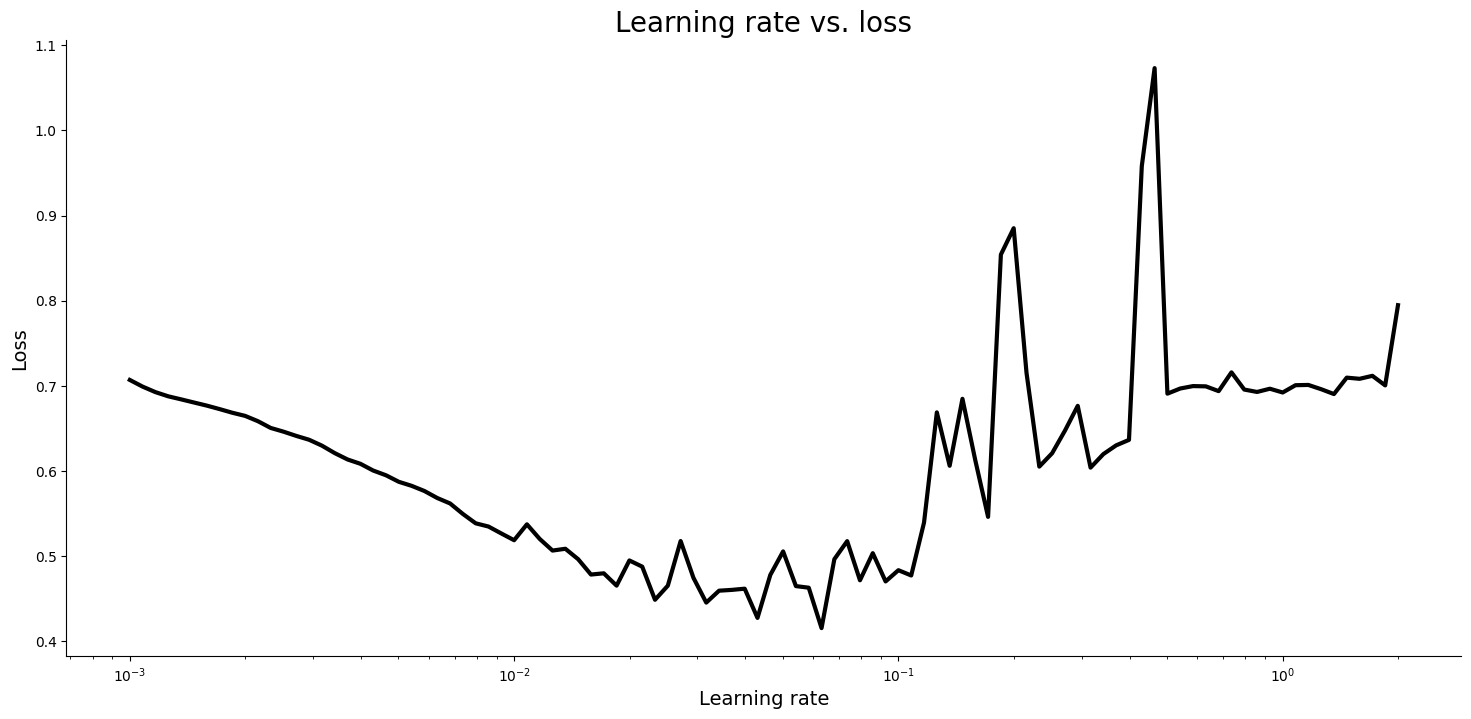

In [30]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates, 
    initial_history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [31]:
model_optimized = tf.keras.Sequential([
    tf.keras.Input(shape=(7,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=30
)

Epoch 1/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.4851
Epoch 2/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.4776
Epoch 3/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.4776
Epoch 4/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4851
Epoch 5/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5149
Epoch 6/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5373
Epoch 7/30
5/5 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5746
Epoch 8/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5970
Epoch 9/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5970
Epoch 10/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6194
Epoch 11/30
5/5 [======================

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

2/2 [==============================] - 0s 3ms/step
Accuracy on the test set: 0.82

Confusion matrix:
[[17  3]
 [ 3 11]]


In [34]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='relu', input_shape=(7,)),
        tf.keras.layers.Dense(15, 'relu'),
        tf.keras.layers.Dense(20, 'relu'),
        tf.keras.layers.Dense(1, 'sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.BinaryCrossentropy(), 
                  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

    return model

In [35]:
modelM1 = create_model()

In [36]:
modelM1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 5)                 40        
                                                                 
 dense_33 (Dense)            (None, 15)                90        
                                                                 
 dense_34 (Dense)            (None, 20)                320       
                                                                 
 dense_35 (Dense)            (None, 1)                 21        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
